# FA692 Homework 1
# Due: Wednesday, March 22 @ 11:59PM

Name: Ryan Shea

Date: 2023-03-18

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed of random number generator
CWID = 10445281 #Place here your Campus wide ID number, this will personalize
#your results, but still maintain the reproduceable nature of using seeds.
#If you ever need to reset the seed in this assignment, use this as your seed
#Papers that use -1 as this CWID variable will earn 0's so make sure you change
#this value before you submit your work.
personal = CWID % 10000
np.random.seed(personal)

## Question 1 (20pt)

### Question 1.1
An urn contains four type A coins and one type B coin. When a type A coin is flipped, it comes up heads with probability 1/4, whereas when a type B coin is flipped, it comes up heads with probability 1/2. A coin is randomly chosen (uniformly) from the urn and flipped. Given that the flip landed on heads, what is the probability that it was a type B coin?
  
Hint: Recall Bayes' theorem.

(Note that the following fields can be added wherever you desire to show a solution.  You can use the Markdown blocks for a written response, and the Code blocks for showing python code and its output.  Some questions will require just one, and some both.  I will not always provide you with these, but you can add them at your discretion wherever necessary.  If it makes sense to do the python code first then that's fine.  If you want to include multiple of each, that's ok too.  Do what you feel is necessary to answer the question fully.)

Bayes Theorem:
$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$

In this case, A is the probability that it was a type B coin and B is the fact that it landed on heads.

$$P(B|A)$$
B is the fact that it landed on heads. We know that the probability of a type B coin landing on heads is 1/2. Therefore, $$P(B|A) = 1/2$$

$$P(A)$$
A is the probability that it was a type B coin. We know that there is one type B coin in the urn, and four type A coins. Therefore, $$P(A) = 1/5$$

$$P(B)$$
B is the fact that it landed on heads. We know that the probability of a type A coin landing on heads is 1/4, and the probability of a type B coin landing on heads is 1/2. Therefore, $$P(B) = 1/4 * 4/5 + 1/2 * 1/5 = 6/20 = 3/10$$

$$P(A|B)$$

$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$

$$ = \frac{1/2 * 1/5}{3/10} = 1/3$$

### Question 1.2
Simulate this system by sequentially sampling a coin and a flip. From 10,000 repeated simulations, what percentage of heads results came from a type B coin? Comment on your answer in comparison with the result you found in Question 1.1.

Simulated Probability: 0.3368112161721552


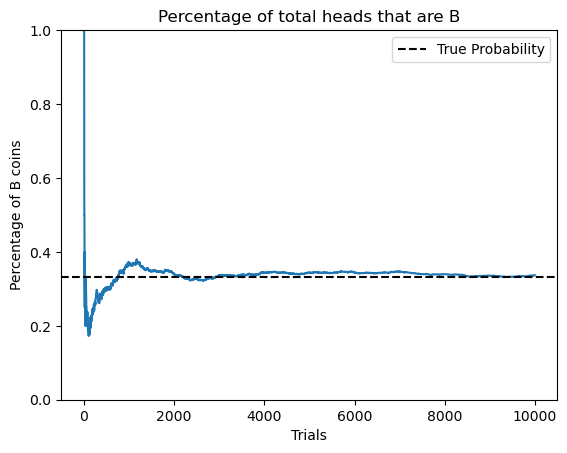

In [2]:
def system(trials=10000):
    coins = np.array(['A', 'A', 'A', 'A', 'B'])

    total_heads = 0
    total_b = 0
    prob = np.zeros(trials)

    for i in range(trials):

        pick = np.random.choice(coins)

        if pick == 'B':
            res = np.random.choice([0, 1]) # 0 is tails, 1 is heads
            if res == 1:
                total_heads += 1
                total_b += 1
        
        else: # pick == 'A'
            res = np.random.choice([0, 0, 0, 1]) # 0 is tails, 1 is heads

            if res == 1:
                total_heads += 1
        
        prob[i] = 0 if total_heads == 0 else total_b / total_heads

    return prob[-1], prob # last prob, entire prob array


sim_prob, prob_array = system()

print(f"Simulated Probability: {sim_prob}")

plt.plot(prob_array)
plt.title("Percentage of total heads that are B")
plt.xlabel("Trials")
plt.ylabel("Percentage of B coins")
plt.axhline(1/3, xmin=0, linestyle='--', color='black', label='True Probability')
plt.ylim(top=1, bottom=0)
plt.legend()
plt.show()



You can see from the visualization that the law of large numbers holds here: as the number of trials increases, the percentage of heads results that come from a type B coin approaches 1/3, or the true probability.

## Question 2 (10pt)

### Question 2.1
Generate a vector `x` containing 1,000 realizations of a random normal variable with mean -3 and variance 10. Plot a histogram of `x` using 35 bins.

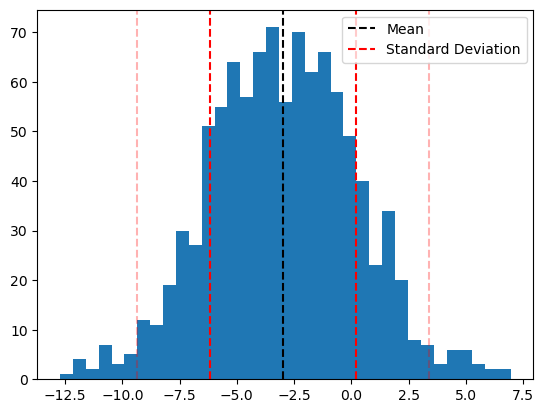

In [3]:
# Enter your code here
x = np.random.normal(loc=-3, scale=np.sqrt(10), size=1000)
plt.hist(x, bins=35)
plt.axvline(x.mean(), ymin=0, color='black', linestyle='--', label="Mean")
plt.axvline(x.mean() + x.std(), ymin=0, color='red', linestyle='--', label="Standard Deviation")
plt.axvline(x.mean() - x.std(), ymin=0, color='red', linestyle='--')
plt.axvline(x.mean() + 2*x.std(), ymin=0, color='red', linestyle='--', alpha=0.3)
plt.axvline(x.mean() - 2*x.std(), ymin=0, color='red', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

### Question 2.2
Calculate the mean and standard deviation of these 1,000 values. Do your answers make sense?

In [4]:
print(f"Mean: \t\t\t{x.mean()}", end='\n\n')

print(f"Standard Deviation:\t{x.std()}", end='\n\n')

print(f"Square root of 10:\t{np.sqrt(10)}")

Mean: 			-2.969388881431748

Standard Deviation:	3.1895700668241416

Square root of 10:	3.1622776601683795


From these numbers you can see that they make sense. We know the the true mean is -3, and the mean of the 1,000 values is very close to -3. We also know that the standard deviation is $\sqrt{10}$, and the standard deviation of the 1,000 values is very close to that number.

### Question 2.3
Take out 20 random samples of 250 observations each (with replacement).  Create a vector of the means of each sample.  Calculate the mean of the sample means and the standard deviation of the sample means.  What do you observe about these results?

In [5]:
# Enter your code here
mu = np.zeros(20)
for i in range(len(mu)):
    mu[i] = np.random.choice(x, size=250, replace=True).mean() # mean of the sample

print(mu, end='\n\n')
print(f"Mean: \t\t\t{mu.mean()}\nStandard Deviation:\t{mu.std()}")

print(f"sqrt(10)/sqrt(250):\t{np.sqrt(10) / np.sqrt(250)}")

[-2.52932228 -2.85345331 -2.88082014 -3.17274625 -2.74619447 -3.40833424
 -2.5942394  -2.86448827 -2.99619653 -3.19304414 -2.84709214 -3.02626532
 -3.30970997 -3.05754518 -3.01288688 -3.18917913 -2.69271677 -3.23933854
 -2.8394857  -2.98669391]

Mean: 			-2.9719876286564535
Standard Deviation:	0.23018573055109315
sqrt(10)/sqrt(250):	0.2


Here, you can see that the mean is sufficiently close to -3 and this time the standard deviation is sufficiently close to $\frac{\sqrt{10}}{\sqrt{250}}$. This means that the central limit theorem holds here.

## Question 3 (10pt)

## Question 3.1
Download stock price data for 4 stocks of your choice from January 1, 2020 through December 31, 2022. (All chosen stocks must have price data for the entire time period.) Find the mean and standard deviation of the daily log returns for each stock in your data set.  

In [6]:
# Enter your code here
import datetime
import yfinance as yf
import pandas as pd

stocks = ['VOO', 'SPXL', 'JPM', 'WFC']
start = datetime.date(2022, 1, 1)
end = datetime.date(2022, 12, 31)

data = yf.download(stocks, start=start, end=end)['Adj Close']

returns = data.apply(lambda x: np.log(x / x.shift())).dropna() # log returns
returns.head()

[*********************100%***********************]  4 of 4 completed


,JPM,SPXL,VOO,WFC
Date,,,,
2022-01-04,0.037209,-0.001165,-0.000410,0.039046
2022-01-05,-0.018451,-0.059858,-0.019340,-0.008759
2022-01-06,0.010568,-0.002698,-0.001348,0.025303
2022-01-07,0.009859,-0.011531,-0.003471,0.021034
2022-01-10,0.000957,-0.003923,-0.001307,0.010534


In [7]:
m = returns.mean()
s = returns.std()

table = pd.DataFrame({'Mean': m, 'Standard Deviation': s})
table

,Mean,Standard Deviation
JPM,-0.000624,0.018779
SPXL,-0.003405,0.045785
VOO,-0.000827,0.015264
WFC,-0.000731,0.021145
